Agustina Surya Dewi

# Dataset

Dataset yang digunakan merupakan kumpulan data penyakit jantung dengan beberapa fitur yang dapat
digunakan untuk memprediksi kemungkinan penyakit jantung. Fitur tersebut antara lain Age, Sex,
ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, dan
ST_Slope. Selain itu, terdapat kolom terakhir (HeartDisease) yang berisi label yaitu, apakah pasien tersebut
didiagnosis memiliki penyakit jantung atau tidak.

sumber : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
print('Volume data')
df.shape

Volume data


(918, 12)

Dataset ini berisi 918 baris dan 12 kolom.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


1. Age : Usia pasien dalam tahun
2. Sex : Jenis kelamin pasien
    * F : Perempuan
    * M : Laki-laki
3. ChestPainType : Jenis nyeri dada yang dialami pasien
    * TA : Typical Angina
    * ATA : Atypical Angina  
    * NAP : Nyeri Non-Angina
    * ASY : Tanpa gejala
4. Resting BP : Tekanan darah istirahat pasien (mm Hg)
5. Cholesterol : kadar cholesterol [mm/dl]
6. FastingBS : Kadar gula darah puasa pasien (mg/dl)
    * 1 : jika FastingBS > 120 mg/dl
    * 0 : sebaliknya
7. RestingECG : hasil elektrokardiogram istirahat
    * Normal :Normal,
    * ST : mengalami kelainan gelombang ST-T (T inversi gelombang dan/atau elevasi ST atau
depresi > 0,05 mV)
    * LVH: terlihat ventrikel kiri yang mungkin atau pasti hipertrofi menurut kriteria Estes
8. MaxHR : Denyut jantung maksimum yang dicapai pasien [Nilai numerik antara 60 dan 202]
9. ExerciseAngina : Adanya angina akibat olahraga pada pasien
    * Y : Yes
    * N : Tidak
10. Oldpeak : oldpeak = ST [Nilai numerik diukur dalam depresi]
11. ST_Slope : kemiringan puncak segmen ST saat olahraga [Up : menanjak, flat: datar, down: miring]
12. HeartDisease : Adanya penyakit jantung 0: Normal dan 1: penyakit jantung

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Visualisasi dan Eksplorasi

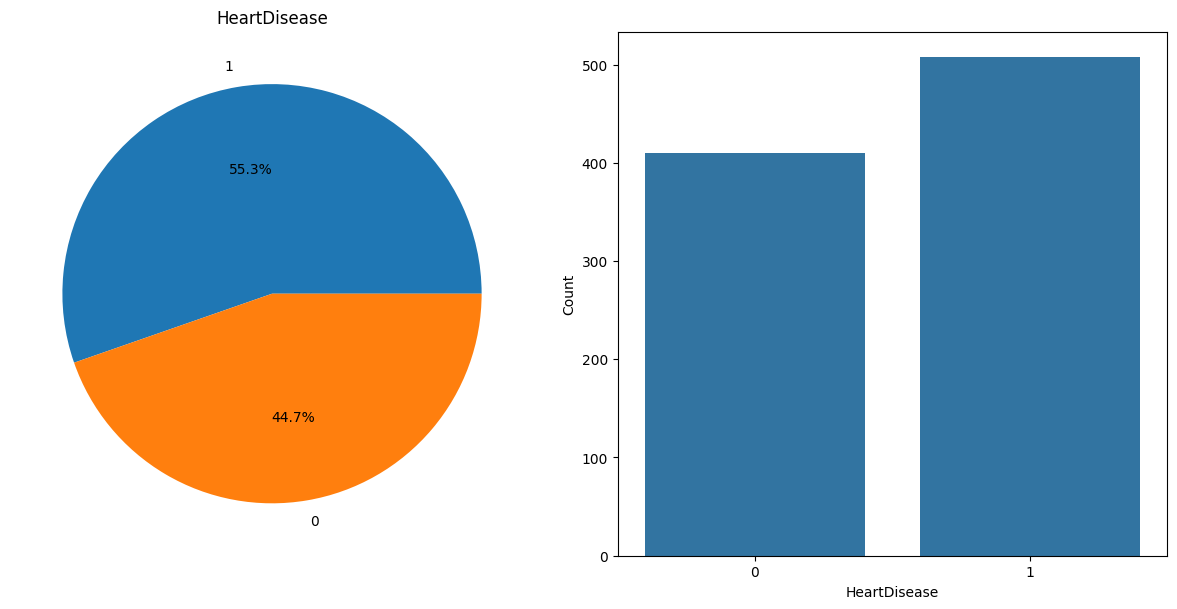

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat sebuah figure dengan 1 baris dan 2 kolom subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# pie chart
df['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[0])
axs[0].set_title('HeartDisease')
axs[0].set_ylabel('')

# count plot
sns.countplot(x='HeartDisease', data=df, ax=axs[1])
axs[1].set_xlabel('HeartDisease')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

* 0: Normal
* 1: penyakit jantung
* Data menunjukkan bahwa lebih banyak pasien menderita penyakit jantung dibandingkan dengan yang memiliki hasil normal

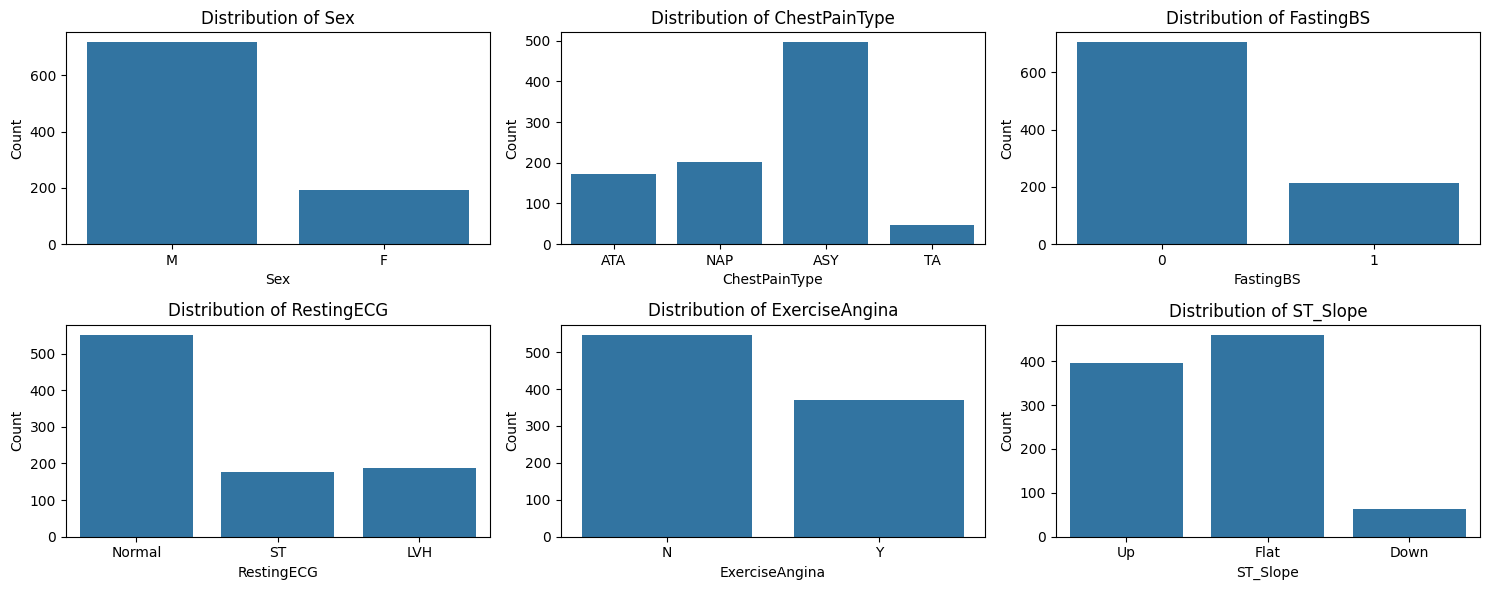

In [ ]:
def countplot(data):
    num_rows = 2
    num_cols = 3
    total_plots = num_rows * num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 3 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(data.columns):
        sns.countplot(x=data[column], data=data, ax=axes[i])
        axes[i].set_title(f"Distribution of {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

column_count = df[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]
countplot(column_count)

* Penyakit jantung lebih sering terjadi pada pria dibandingkan wanita dalam dataset ini. Ini dapat menunjukkan bahwa faktor risiko penyakit jantung mungkin lebih tinggi pada pria.
* Nyeri dada tanpa gejala (asymptomatic) adalah tipe nyeri dada yang paling umum. Hal ini mungkin menunjukkan bahwa banyak pasien dengan penyakit jantung tidak mengalami nyeri dada yang khas atau nyeri dada mereka tidak dianggap serius.
* Pasien dengan kadar gula darah puasa lebih dari 120 mg/dL, yang mengindikasikan pre-diabetes atau diabetes, lebih banyak dibandingkan pasien dengan kadar gula darah puasa normal. Ini menunjukkan hubungan antara kadar gula darah tinggi dan penyakit jantung.
* Sebagian besar pasien memiliki hasil elektrokardiogram istirahat yang normal dibandingkan dengan tipe ST dan LVH. Ini mungkin menunjukkan bahwa banyak pasien tidak menunjukkan kelainan pada EKG saat istirahat, meskipun mereka menderita penyakit jantung.
* Lebih banyak pasien yang tidak mengalami angina (nyeri dada) akibat olahraga dibandingkan yang mengalami angina. Ini mungkin menunjukkan bahwa tidak semua pasien jantung menunjukkan gejala angina saat melakukan aktivitas fisik.
* Kemiringan segmen ST yang datar (Flat) saat olahraga lebih umum dibandingkan dengan kemiringan yang naik (UP) atau turun (Down). Ini menunjukkan pola umum dari perubahan segmen ST pada pasien jantung selama tes stres atau aktivitas fisik.

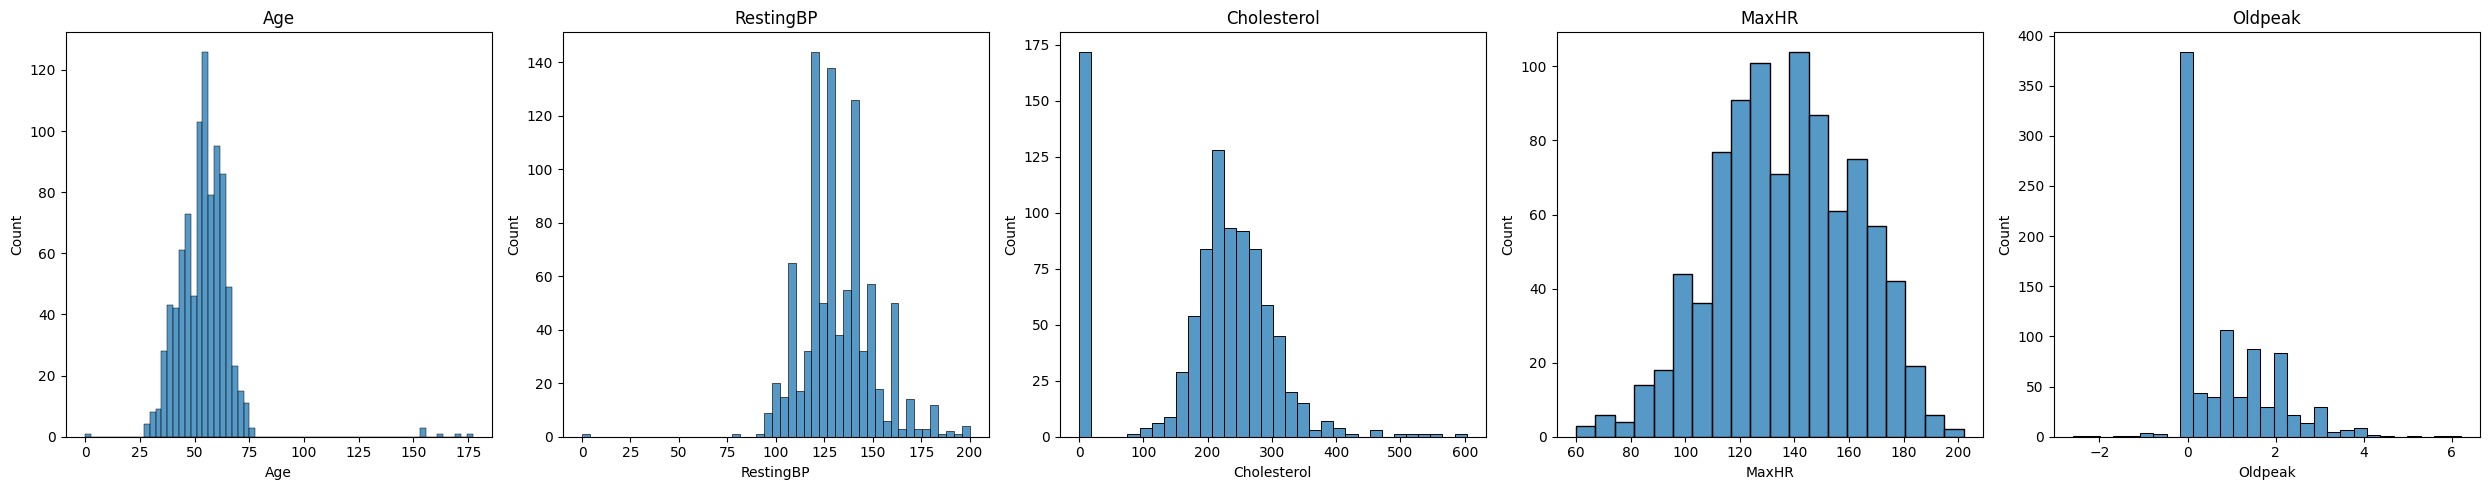

In [ ]:
def histogramgraph(data):
    fig, axes = plt.subplots(1, len(data.columns), figsize=(5 * len(data.columns), 5))

    for i, column in enumerate(data.columns):
      sns.histplot(data=data[column], ax=axes[i])
      axes[i].set_title(f"{column}")

    plt.tight_layout()
    plt.show()

numeric_df = df[['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
histogramgraph(numeric_df)

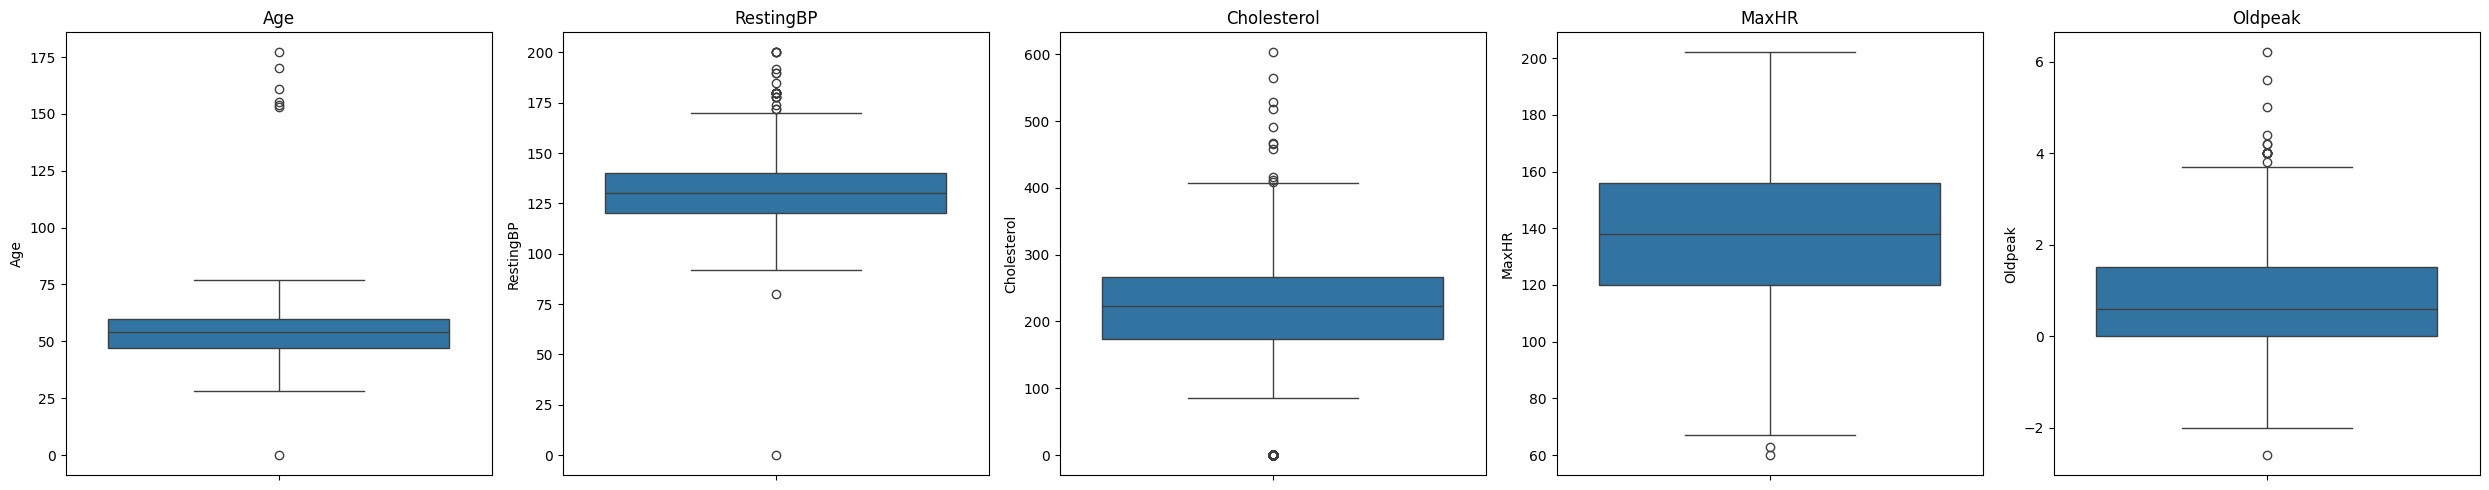

In [ ]:
def cek_outliers_boxplot(data):
    fig, axes = plt.subplots(1, len(data.columns), figsize=(5 * len(data.columns), 5))

    for i, column in enumerate(data.columns):
        sns.boxplot(data=data[column], ax=axes[i])
        axes[i].set_title(f"{column}")

    plt.tight_layout()
    plt.show()


cek_outliers_boxplot(numeric_df)

Dari histogram dan boxplot diatas diperoleh bahwa terdapat outliers pada beberapa kolom. Selain itu, terdapat
nilai yang tidak mungkin terjadi seperti contohnya pada cholesterol dan umur yang bernilai 0 dan oldpeak
yang bernilai negatif. Untuk itu, akan dilakukan penanganan untuk masing-masing permasalahan tersebut.

# Data Cleaning dan Preprocessing

In [ ]:
# Batas atas dan batas bawah
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# outliers
def show_outliers(df, column, lower_bound, upper_bound):
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers di kolom {column}:")
    print(outliers[column].to_string(index=False))

# Mendeteksi dan menampilkan outliers untuk setiap kolom
for column in numeric_df.columns:
    lower_bound, upper_bound = detect_outliers_iqr(df, column)
    print(f"Batas bawah untuk kolom {column}: {lower_bound}")
    print(f"Batas atas untuk kolom {column}: {upper_bound}")
    show_outliers(df, column, lower_bound, upper_bound)

Batas bawah untuk kolom Age: 27.5
Batas atas untuk kolom Age: 79.5
Outliers di kolom Age:
155.0
  0.0
161.0
177.0
153.0
170.0
154.0
Batas bawah untuk kolom RestingBP: 90.0
Batas atas untuk kolom RestingBP: 170.0
Outliers di kolom RestingBP:
190
180
180
180
200
180
180
180
 80
200
185
200
180
180
  0
178
172
180
190
174
178
180
200
192
178
180
180
172
Batas bawah untuk kolom Cholesterol: 32.625
Batas atas untuk kolom Cholesterol: 407.625
Outliers di kolom Cholesterol:
468
518
412
529
466
603
491
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0


In [ ]:
# Menghitung nilai 0 di setiap kolom
for column in numeric_df.columns:
  print(f'{column} :',(df[column]==0).sum())

Age : 1
RestingBP : 1
Cholesterol : 172
MaxHR : 0
Oldpeak : 368


* Mengganti nilai 0 pada kolom 'Age','RestingBP', dan 'Cholesterol' dengan median dari masing-masing kolom.
* Nilai 0 pada kolom ‘Oldpeak’ dipertahankan karena Oldpeak bernilai 0 masih memungkinkan terjadi

In [ ]:
# Mengganti nilai 0 dengan median pada kolom
kol = df[['Age','RestingBP', 'Cholesterol']]
for column in kol.columns:
    median = df[column][df[column] != 0].median()  # Menghitung median, tidak termasuk nilai 0
    df[column] = df[column].replace({0 : median})

In [ ]:
# Menghitung nilai 0 di setiap kolom
for column in numeric_df.columns:
  print(f'{column} :',(df[column]==0).sum())

Age : 0
RestingBP : 0
Cholesterol : 0
MaxHR : 0
Oldpeak : 368


Outliers (khususnya nilai yang melebihi batas atas) pada kolom ‘Age’ juga akan diganti dengan median
dari kolom ‘Age’

In [ ]:
# Menangani outliers pada kolom Age
med = df['Age'].median()
df['Age'] = df['Age'].apply(lambda x: med if x >= 150 else x)

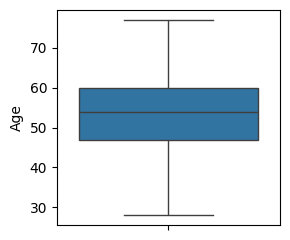

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.boxplot(data=df['Age'])

plt.tight_layout()
plt.show()

Nilai yang bernilai negatif pada kolom ‘Oldpeak’ akan diganti dengan mutlak dari nilai tersebut

In [ ]:
# Menangani outliers (nilai negatif) kolom oldpeak
df['Oldpeak'] = df['Oldpeak'].abs()

print(df[df['Oldpeak']<0])

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


Nilai yang diindikasikan sebagai outliers (selain 0) pada kolom 'RestingBP', 'Cholesterol', dan ‘MaxHR’
akan dipertahankan karena kemungkinan ada kondisi khusus pasien sehingga menghasilkan nilai-nilai
tersebut

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.452250,132.538126,243.204793,0.233115,136.809368,0.915251,0.553377
std,9.393689,17.990127,53.401297,0.423046,25.460334,1.042712,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

In [ ]:
# Menangani missing value
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Setelah ditelaah, dataset Heart Disease ini dianggap cukup baik untuk memenuhi kebutuhan analisis data
science yang bertujuan untuk membangun model klasifikasi untuk identifikasi dan prediksi penyakit jantung.
Meskipun ada beberapa nilai yang hilang yang perlu diatasi dan outliers, keseluruhan kualitas data ini
mendukung pengembangan model yang akurat dan relevan dalam konteks kesehatan.

In [ ]:
# Mengetahui variasi kategori yang ada di setiap kolom kategorikal
kategorical_df = df.select_dtypes(include=['object'])
for i in kategorical_df.columns:
  print(f"{i}: {kategorical_df[i].unique()}", '\n')

Sex: ['M' 'F'] 

ChestPainType: ['ATA' 'NAP' 'ASY' 'TA'] 

RestingECG: ['Normal' 'ST' 'LVH'] 

ExerciseAngina: ['N' 'Y'] 

ST_Slope: ['Up' 'Flat' 'Down'] 



Transformasi data yang dilakukan adalah mengganti tipe data object (string) menjadi integer (int)

In [ ]:
# Encoding
df['Sex'] = df['Sex'].replace(['M','F'],[0, 1])
df['ChestPainType'] = df['ChestPainType'].replace([ 'ASY', 'NAP', 'ATA', 'TA'],[0, 1, 2, 3])
df['RestingECG'] = df['RestingECG'].replace(['Normal', 'ST', 'LVH'],[0, 1, 2])
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N', 'Y'],[0, 1])
df['ST_Slope'] = df['ST_Slope'].replace(['Up', 'Flat', 'Down'],[0, 1, 2])

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.0,0,2,140,289,0,0,172,0,0.0,0,0
1,49.0,1,1,160,180,0,0,156,0,1.0,1,1
2,37.0,0,2,130,283,0,1,98,0,0.0,0,0
3,48.0,1,0,138,214,0,0,108,1,1.5,1,1
4,54.0,0,1,150,195,0,0,122,0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 86.2 KB


<Axes: >

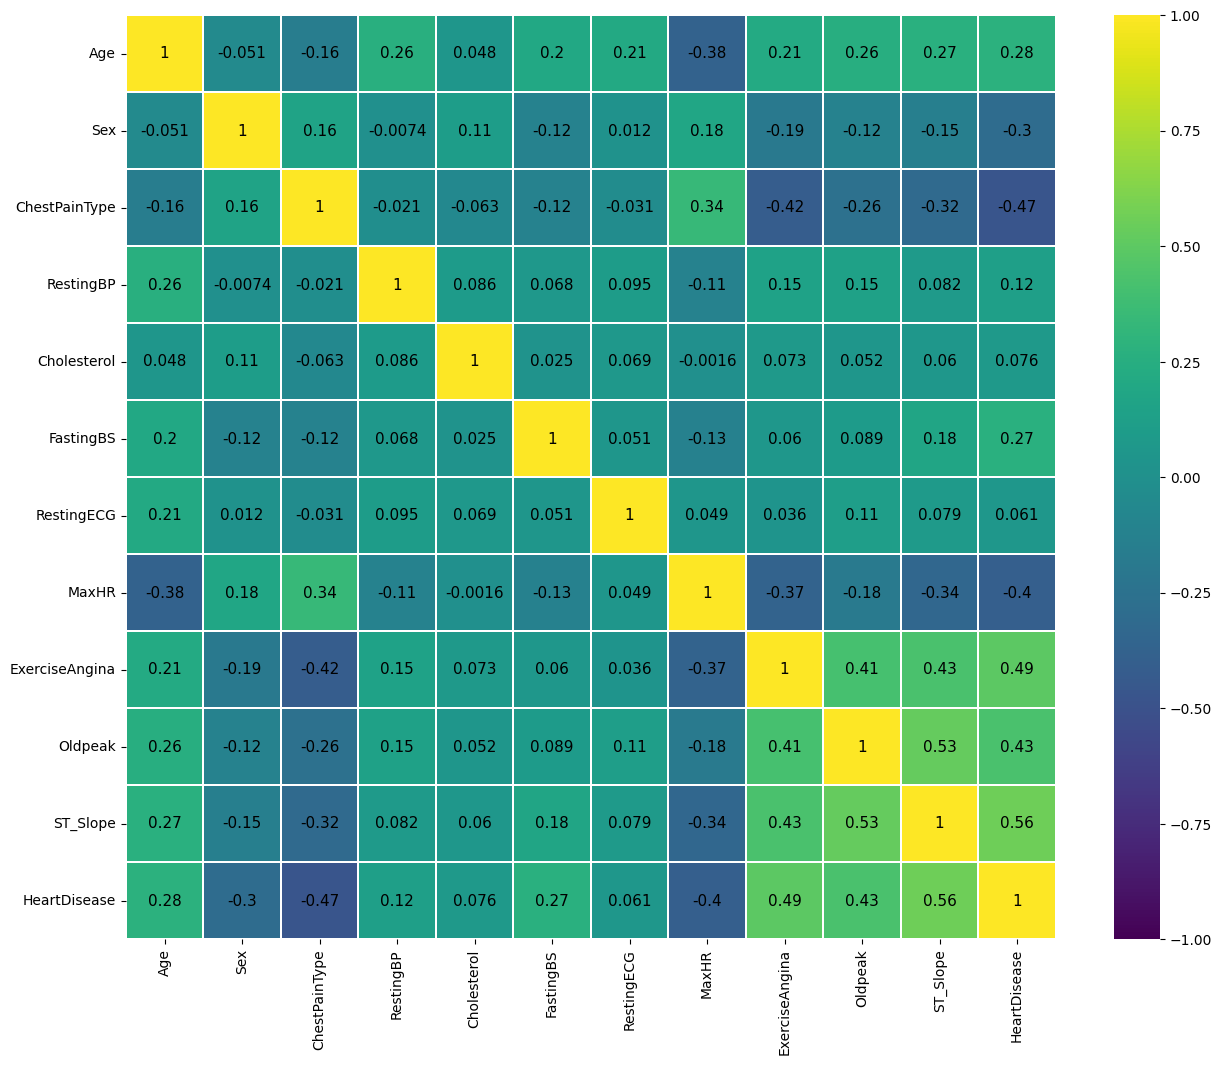

In [ ]:
# Menghitung korelasi
corr = df.corr()

# Membuat heatmap dari korelasi
plt.figure(figsize=(15, 12))
sns.heatmap(
    data = corr,
    vmax = 1.0,
    vmin = -1.0,
    linewidths = 0.1,
    annot_kws = {
        "size": 11,
        "color": "black"
    },
    cmap = 'viridis',
    annot = True
)

* Korelasi negatif antara HeartDisease dengan MaxHR menunjukkan bahwa ada hubungan terbalik antara tingkat denyut jantung maksimum (MaxHR) dengan kemungkinan menderita penyakit jantung. Artinya, semakin tinggi nilai MaxHR, semakin rendah kemungkinan seseorang untuk mengalami penyakit jantung.
* Korelasi yang kecil antara RestingECG dan HeartDisease, yaitu sebesar 0.061, menunjukkan bahwa hubungan antara hasil elektrokardiogram istirahat (RestingECG) dan kemungkinan menderita penyakit jantung sangat lemah

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decission Tree

In [ ]:
# membuat model Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

# melakukan pelatihan model terhadap data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

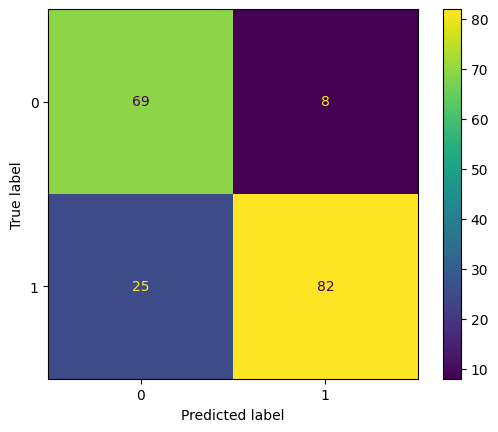

In [ ]:
y_pred = tree_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
# Evaluasi model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        94
           1       0.77      0.91      0.83        90

    accuracy                           0.82       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.82      0.82       184



Akurasi (82%) menunjukkan bahwa model secara umum dapat memprediksi dengan baik antara normal dan
Heart Disease.
Kriteria kesuksesan yang tertulis di instruksi adalah ketika akurasi model (accuracy) mencapai nilai > 70%.
Sehingga model Decision Tree diatas telah memberikan performa yang cukup baik atau sesuai dengan
harapan yang ditetapkan dengan akurasi yang diperoleh adalah 82%.

           Feature  Importance
10        ST_Slope    0.407734
7            MaxHR    0.094086
4      Cholesterol    0.089467
3        RestingBP    0.087230
9          Oldpeak    0.074100
2    ChestPainType    0.065328
0              Age    0.063311
8   ExerciseAngina    0.053954
1              Sex    0.035152
5        FastingBS    0.016241
6       RestingECG    0.013397


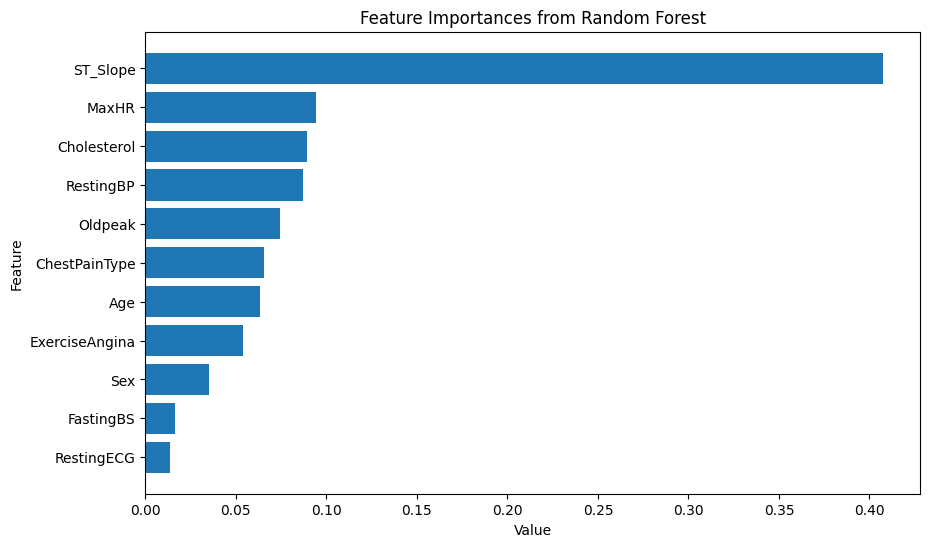

In [ ]:
importances = tree_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Menampilkan feature importances
print(feature_importances)

# Visualisasi feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

Dapat dilihat bahwa fitur yang paling berpengaruh penting dalam kasus ini adalah ST_Slope, MaxHR, dan Cholesterol sedangkan fitur RestingECG yang paling rendah.

* ST_Slope yang menunjukkan kemiringan segmen ST pada tes stres sangat relevan dengan risiko penyakit jantung. Kemiringan segmen ST yang datar atau menurun sering kali menunjukkan adanya iskemia miokardial, yaitu kekurangan pasokan darah ke otot jantung.
* MaxHR yang menunjukkan denyut jantung maksimum selama tes stres bisa menjadi indikator kebugaran kardiovaskular. Meskipun korelasi sebelumnya menunjukkan hubungan negatif, MaxHR yang tinggi dapat menunjukkan kapasitas jantung yang baik dan mungkin berhubungan dengan risiko penyakit jantung yang lebih rendah dalam konteks tertentu.
* Cholesterol adalah fitur penting karena kadar kolesterol tinggi merupakan faktor risiko utama untuk penyakit jantung. Kolesterol tinggi dapat menyebabkan penumpukan plak di arteri, yang meningkatkan risiko penyakit jantung.
* RestingECG dengan pengaruh paling rendah menunjukkan bahwa hasil elektrokardiogram saat istirahat tidak memberikan informasi yang banyak tentang risiko penyakit jantung dibandingkan dengan fitur lainnya. Ini bisa jadi karena hasil EKG saat istirahat tidak cukup sensitif untuk mendeteksi penyakit jantung secara efektif tanpa adanya aktivitas fisik.

## Random Forest

In [ ]:
# Membuat instance RandomForestClassifier dengan 150 pohon
forest_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Melatih model dengan data pelatihan
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

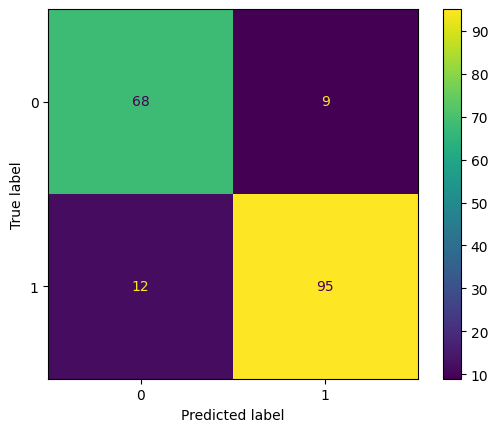

In [ ]:
y_pred = forest_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
# Evaluasi model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        80
           1       0.89      0.91      0.90       104

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



Akurasi (89%) menunjukkan bahwa model secara umum dapat memprediksi dengan baik antara normal dan Heart Disease. Kriteria kesuksesan yang tertulis di instruksi adalah ketika akurasi model (accuracy) mencapai nilai > 70%.
Sehingga model Decision Tree diatas telah memberikan performa yang cukup baik atau sesuai dengan harapan yang ditetapkan dengan akurasi yang diperoleh adalah 89%.

           Feature  Importance
10        ST_Slope    0.242056
9          Oldpeak    0.128458
8   ExerciseAngina    0.103882
2    ChestPainType    0.103814
7            MaxHR    0.100855
0              Age    0.089499
4      Cholesterol    0.081696
3        RestingBP    0.066559
1              Sex    0.034010
5        FastingBS    0.024916
6       RestingECG    0.024256


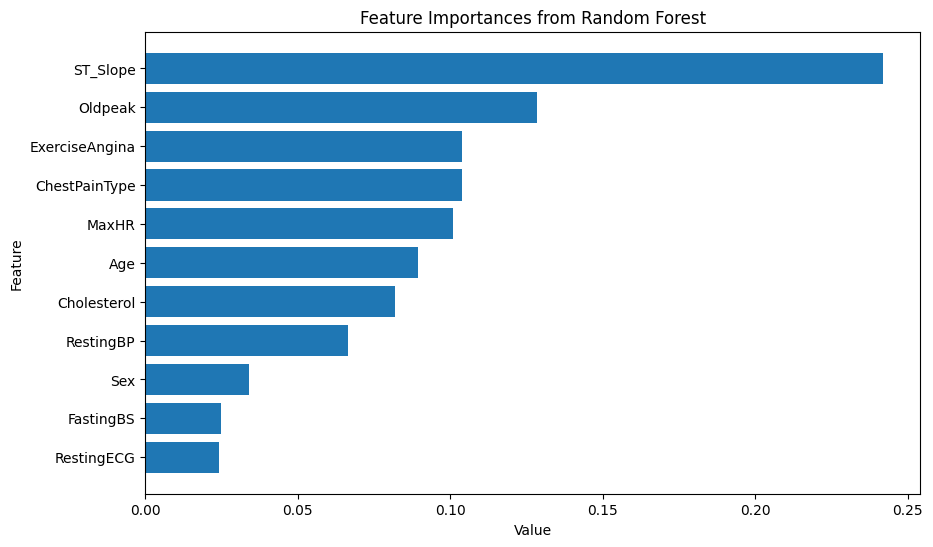

In [ ]:
importances = forest_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Menampilkan feature importances
print(feature_importances)

# Visualisasi feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

Dapat dilihat bahwa fitur yang paling berpengaruh penting dalam kasus ini adalah ST_Slope, Oldpeak, dan ExerciseAngina sedangkan fitur RestingECG yang paling rendah.

* ST_Slope yang menggambarkan kemiringan segmen ST pada tes stres memiliki pengaruh signifikan. Ini menunjukkan bahwa perubahan dalam kemiringan segmen ST selama aktivitas fisik bisa sangat berkaitan dengan risiko penyakit jantung. Biasanya, kemiringan ST yang datar atau menurun dapat menunjukkan adanya masalah jantung.
* Oldpeak, yang mengukur penurunan segmen ST setelah latihan, juga merupakan fitur penting. Penurunan yang signifikan dapat menunjukkan adanya iskemia miokardial, yaitu kekurangan pasokan darah ke otot jantung, yang dapat menjadi indikator penyakit jantung.
* ExerciseAngina, yang menunjukkan apakah pasien mengalami nyeri dada saat olahraga, juga memiliki pengaruh besar. Nyeri dada saat berolahraga adalah gejala umum dari penyakit jantung koroner, sehingga fitur ini sangat relevan.
* RestingECG, dengan pengaruh paling rendah, menunjukkan bahwa hasil EKG pada saat istirahat tidak terlalu banyak memberikan informasi tentang risiko penyakit jantung dibandingkan dengan fitur lainnya. Ini mungkin berarti bahwa hasil EKG saat istirahat mungkin tidak cukup sensitif untuk mendeteksi kondisi jantung yang lebih kompleks tanpa adanya aktivitas fisik.

# Kesimpulan

Dari kedua model yang digunakan untuk memprediksi kemungkinan terjadinya penyakit jantung, model Random Forest menunjukkan akurasi tertinggi. Hal ini mengindikasikan bahwa Random Forest lebih efektif dalam menangkap kompleksitas hubungan antara fitur dan risiko penyakit jantung, sehingga memberikan hasil prediksi yang lebih andal dibandingkan dengan model Decision Tree.

Hasil dari kedua model, Decision Tree dan Random Forest, yang menunjukkan ST_Slope sebagai fitur dengan importance tertinggi dan RestingECG sebagai yang terendah, memberikan beberapa wawasan tentang bagaimana fitur-fitur ini mempengaruhi prediksi penyakit jantung:
* ST_Slope menjadi fitur paling penting, yang menunjukkan bahwa kemiringan segmen ST selama tes stres memiliki pengaruh besar dalam menentukan risiko penyakit jantung. Ini mendukung temuan sebelumnya bahwa perubahan dalam segmen ST dapat memberikan informasi penting mengenai kesehatan jantung.
* RestingECG yang memiliki feature importance paling rendah menunjukkan bahwa hasil EKG saat istirahat kurang berkontribusi dalam model prediksi penyakit jantung dibandingkan dengan fitur lainnya. Ini bisa berarti bahwa hasil EKG saat istirahat mungkin tidak sensitif atau tidak cukup spesifik dalam mendeteksi risiko penyakit jantung.
